In [34]:
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('../Homework_Data/Advertising.csv', index_col=0)

In [7]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [8]:
x = df['TV'].values
y = df['sales'].values

In [30]:
def model(x, beta0, beta1):
    return beta0 + beta1 * x

def RSS(x, y, beta0, beta1):
    return np.sum((y - model(x, beta0, beta1))**2)

def minimum_beta1(x, y):
    x_mean = x.mean()
    y_mean = y.mean()
    beta1 = sum((x - x_mean) * (y - y_mean)) / sum((x - x_mean)**2)
    return beta1

def minimum_beta0(x, y, beta1):
    return y.mean() - beta1 * x.mean()

def standard_error_beta0(x, y, beta0, beta1, n):
    
    sigma2 = RSS(x, y, beta0, beta1)/(n-2)

    term1 = 1/n
    term2 = x.mean()**2 / sum((x - x.mean())**2)

    err = sigma2*(term1 + term2)

    return err

def standard_error_beta1(x, y, beta0, beta1, n):
    
    sigma2 = RSS(x, y, beta0, beta1)/(n-2)
    
    err = sigma2 / np.sum((x - x.mean()))**2

    return err

def confidence_interval(beta, SE):

    return (beta - 2*SE, beta + 2*SE)

def t_test(beta, SE):
    
    return beta/SE


def p_value(t_score, n):

    return 1 - t.cdf(t_score, n-2)




In [31]:
def main(x, y):
    n = len(x)
    
    beta1 = minimum_beta1(x, y)
    beta0 = minimum_beta0(x, y, beta1)
    
    SE_beta0 = standard_error_beta0(x, y, beta0, beta1, n)
    SE_beta1 = standard_error_beta1(x, y, beta0, beta1, n)

    CI_beta0 = confidence_interval(beta0, SE_beta0)
    CI_beta1 = confidence_interval(beta1, SE_beta1)

    t_beta0 = t_test(beta0, SE_beta0)
    t_beta1 = t_test(beta1, SE_beta1)

    p_beta0 = p_value(t_beta0, n)
    p_beta1 = p_value(t_beta1, n)

    print(f'beta0: {beta0:.4f} +/- {SE_beta0:.4f}, p-value: {p_beta0:.4f}')
    print(f'beta1: {beta1:.4f} +/-  {SE_beta1:.4f}, p-value: {p_beta1:.4f}')

    return beta0, beta1, SE_beta0, SE_beta1, CI_beta0, CI_beta1, t_beta0, t_beta1, p_beta0, p_beta1


In [32]:
main(x, y)

beta0: 7.0326 +/- 0.2096, p-value: 0.0000
beta1: 0.0475 +/-  2607714511390776450088960.0000, p-value: 0.5000


(7.032593549127704,
 0.04753664043301969,
 0.20962015795826394,
 2.6077145113907765e+24,
 (6.613353233211176, 7.4518338650442315),
 (-5.215429022781553e+24, 5.215429022781553e+24),
 33.54922359388698,
 1.822923492022403e-26,
 0.0,
 0.5)

beta0: 7.0326 +/- 0.2096, p-value: 0.0000
beta1: 0.0475 +/-  2607714511390776450088960.0000, p-value: 0.5000


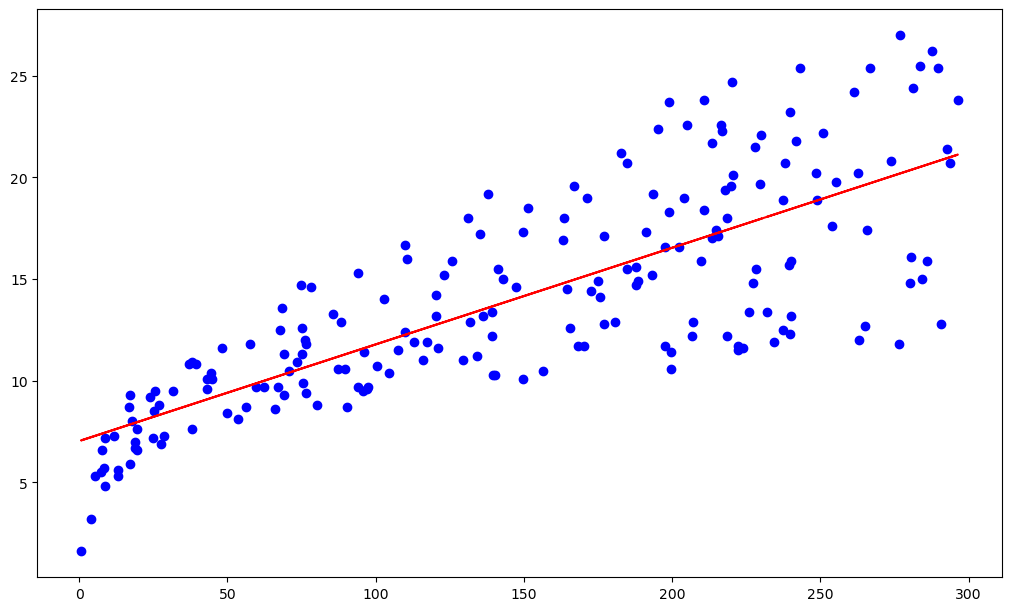

In [38]:
fig, ax = plt.subplots(figsize = (10, 6), constrained_layout=True)
ax.scatter(x, y, color='blue')
ax.plot(x, model(x, *main(x, y)[:2]), color='red')
#ax.fill_between(x, model(x, *main(x, y)[4]), model(x, *main(x, y)[5]), color='red', alpha=0.2)

In [ ]:
def residual_standard_error(x, y, beta0, beta1):
    n = len(x)
    return np.sqrt(RSS(x, y, beta0, beta1)/(n-2))

def TSS(y):
    return np.sum((y - y.mean())**2)

def R_squared(x, y, beta0, beta1):
    return 1 - RSS(x, y, beta0, beta1)/TSS(y)


def correlation(x, y):
    numerator = np.sum(x - x.mean()) * np.sum(y - y.mean())
    denominator = np.sqrt(np.sum((x - x.mean())**2) * np.sum((y - y.mean())**2))
    return numerator/denominator


# Chapter 2 Lab

In [92]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels .stats.anova import anova_lm
from ISLP.models import ( ModelSpec as MS ,
                          summarize ,
                          poly)
from statsmodels.stats.outliers_influence \
import variance_inflation_factor as VIF

In [69]:
def construct_X_array(df, features_cols):
    design = MS(features_cols)
    X = design.fit_transform(df)
    return X

def run_linear_model(df, features_cols, target_col):
    X = construct_X_array(df, features_cols)
    y = df[target_col]
    model = sm.OLS(y, X)
    results = model.fit()

    return results

def plot_residuals(results):
    residual = results.resid
    xaxis = np.arange(len(residual))
    
    fig, ax = plt.subplots(*args, **kwargs)
    ax.scatter(xaxis, residual, *args, *kwargs)
    ax.axhline(0, color='red', lw=2)
    ax.set_xlabel('Index', fontsize = 15)
    ax.set_ylabel('Residual', fontsize = 15)

In [21]:
auto_df = pd.read_csv('../Homework_Data/Auto.csv', na_values='?').dropna()

In [23]:
design = MS(['horsepower'])
design = design.fit(auto_df)
X = design.transform (auto_df)

In [25]:
y = auto_df[['mpg']]

In [70]:
test_result = run_linear_model(auto_df, ['horsepower'], 'mpg')

In [74]:
test_result.conf_int(alpha = 0.05)

,0,1
intercept,38.525212,41.346510
horsepower,-0.170517,-0.145172


In [31]:
def abline(ax , b, m, *args , ** kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax. get_xlim ()
    ylim = [m * xlim [0] + b, m * xlim [1] + b]
    ax.plot(xlim , ylim , *args , ** kwargs)
    

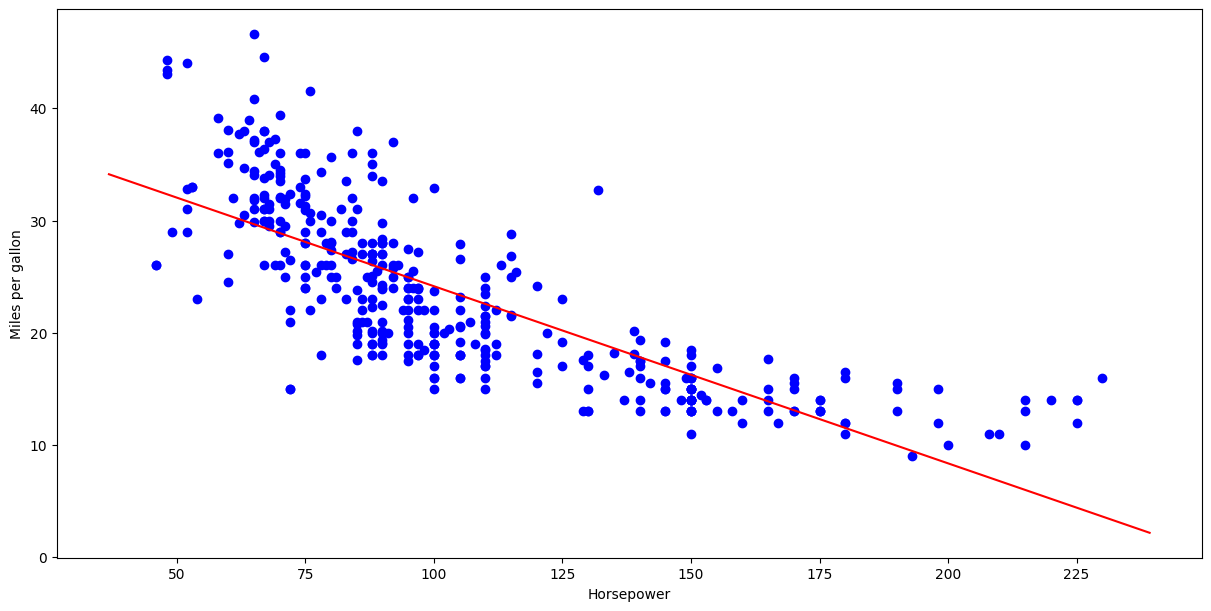

In [36]:
fig, ax = plt.subplots(figsize = (12, 6), constrained_layout=True)
ax.scatter(auto_df['horsepower'], auto_df['mpg'], color='blue')
abline(ax, results.params[0], results.params[1], color='red')
ax.set_xlabel('Horsepower')
ax.set_ylabel('Miles per gallon')
plt.show()


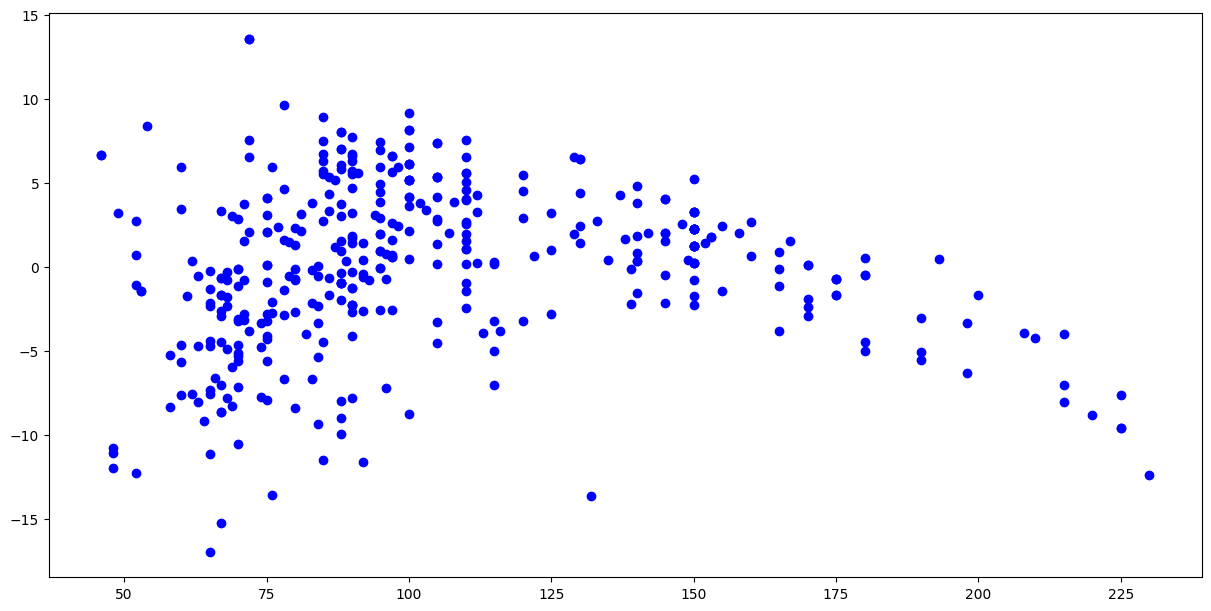

In [37]:
line = results.params[0] + results.params[1] * auto_df['horsepower']
residual_array = line - auto_df['mpg']

fig, ax = plt.subplots(figsize = (12, 6), constrained_layout=True)
ax.scatter(auto_df['horsepower'], residual_array, color='blue')
#ax.scatter()

# Lab 2

In [38]:
import seaborn as sb

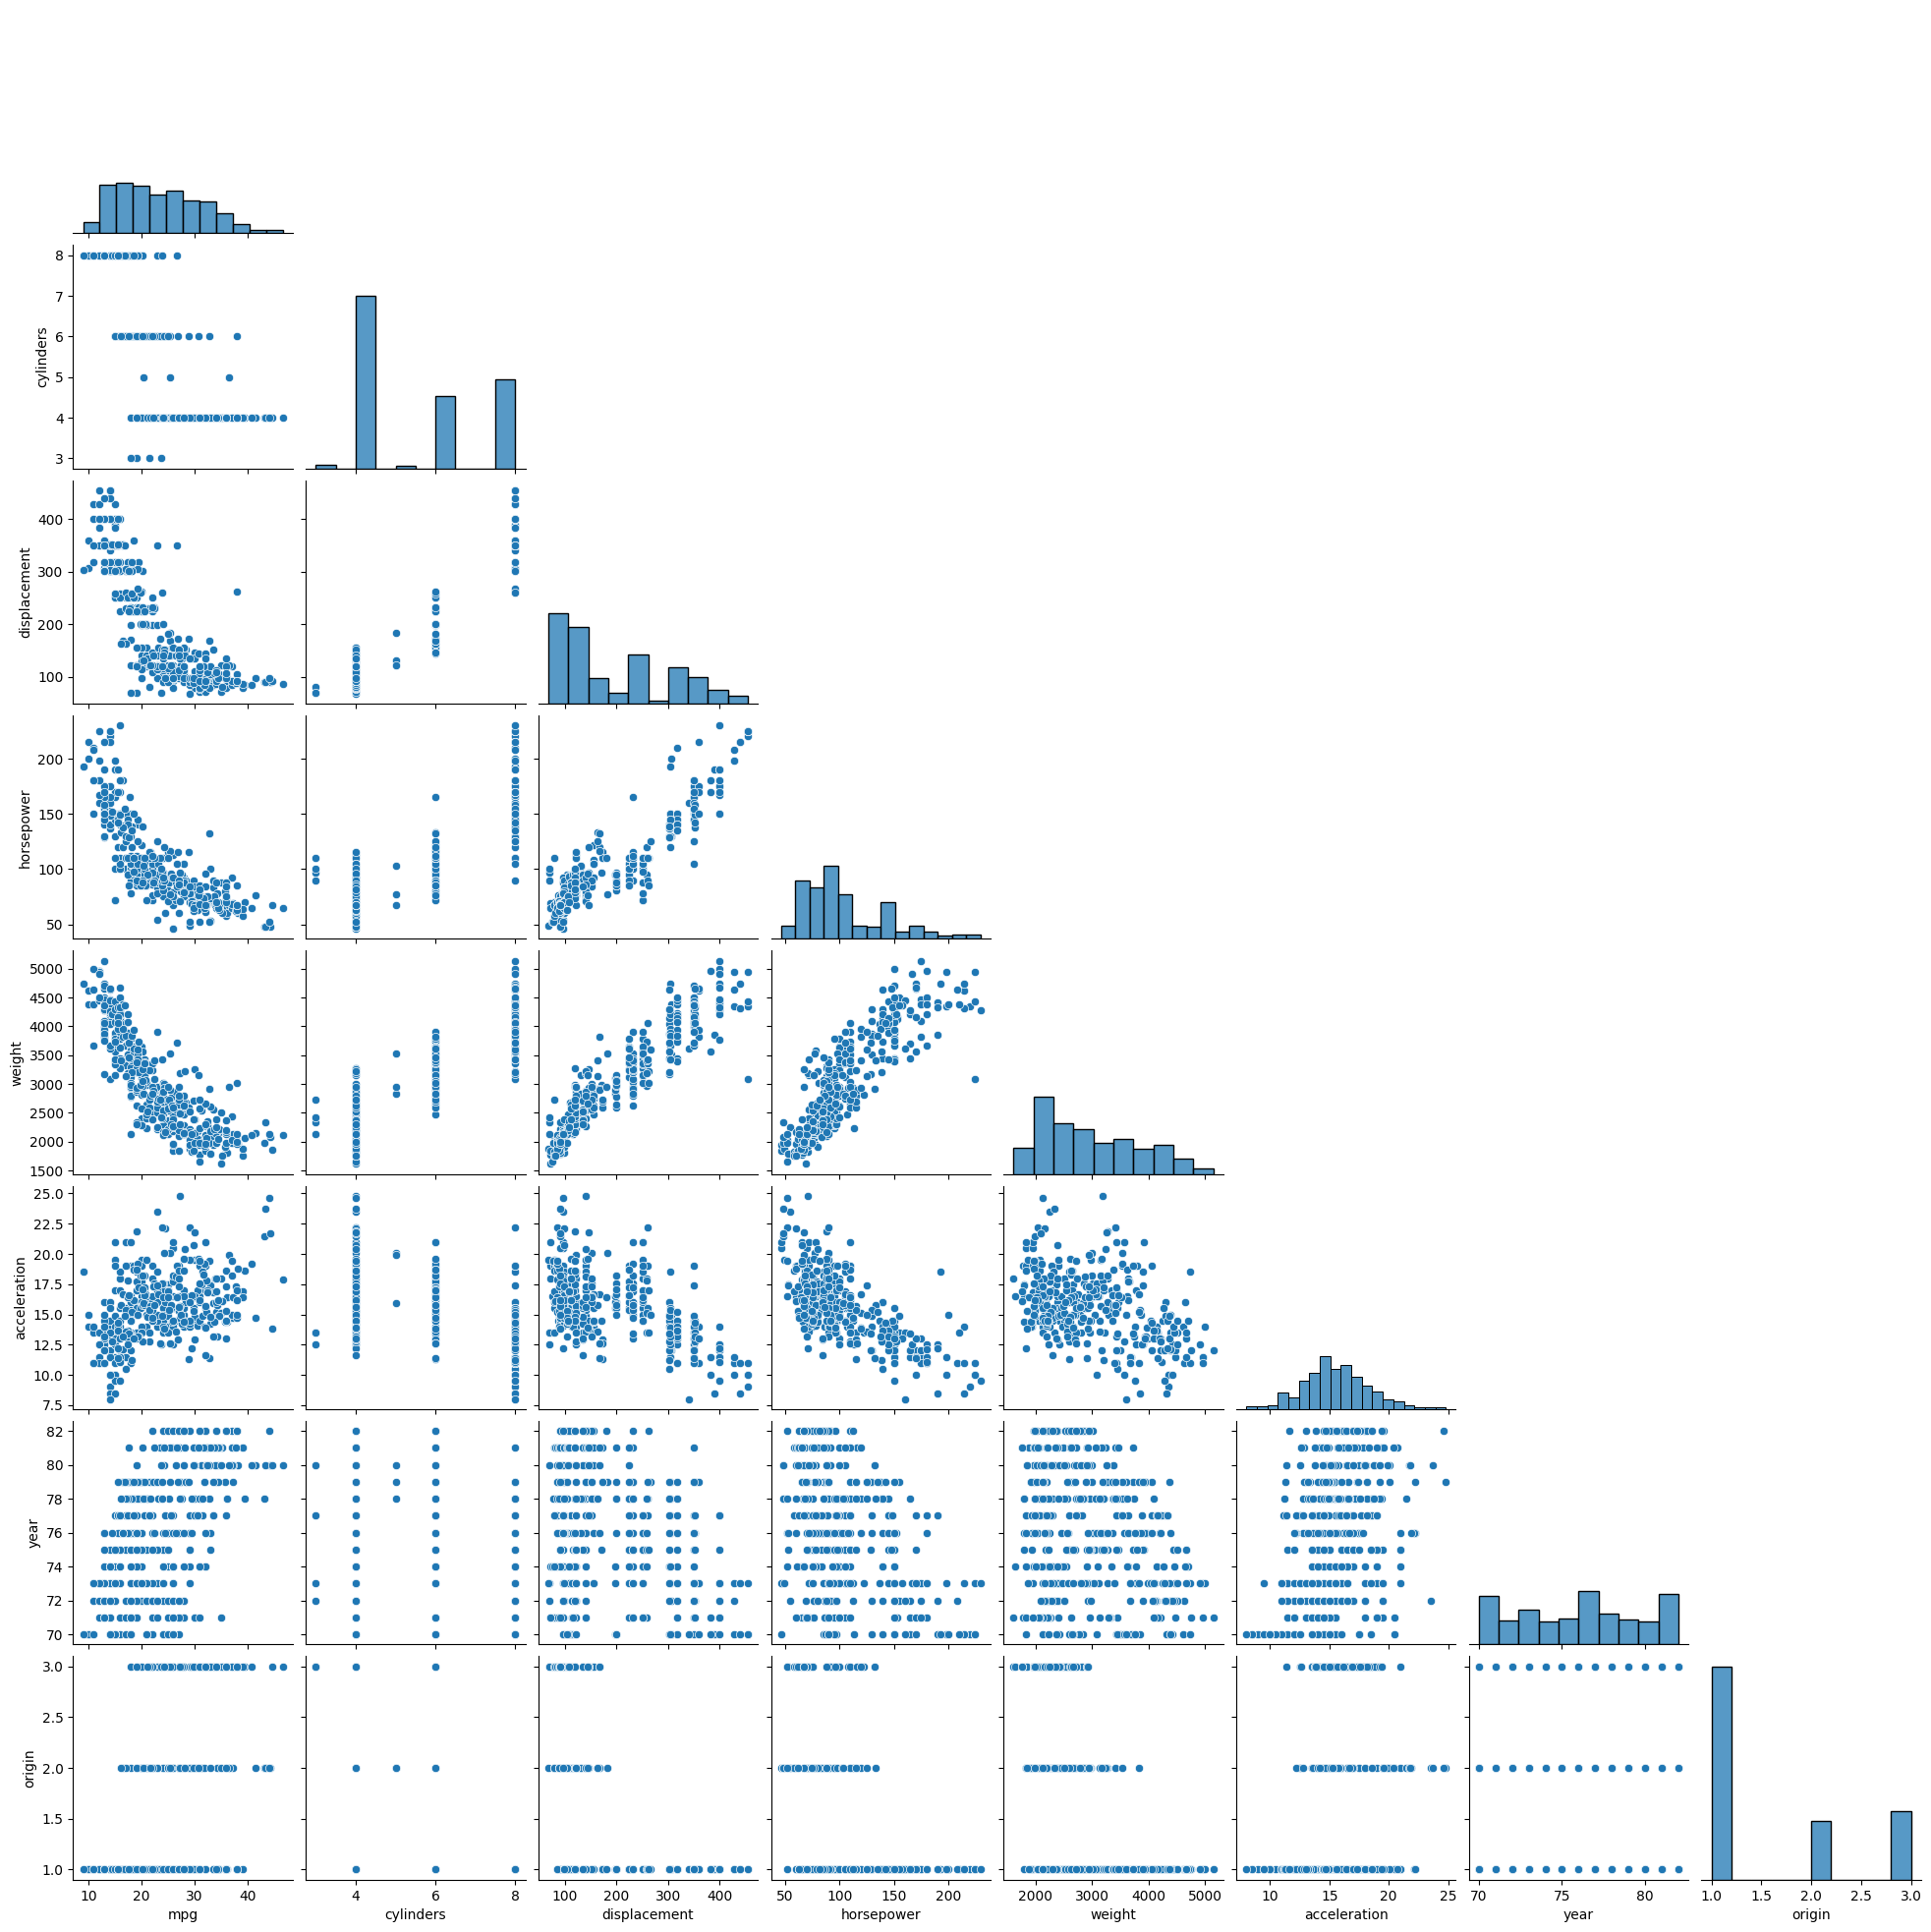

In [39]:
sb.pairplot(auto_df, corner = True)

In [40]:
corr_auto_df = auto_df.corr()

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_49702/2331268066.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_auto_df = auto_df.corr()


In [94]:
auto_df.columns
cols = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin']

features = auto_df[cols]

In [95]:
design = MS(cols)
design = design.fit(features)
X = design.transform (features)

In [59]:
multiple_linear_model = sm.OLS(y, test_df)
results = multiple_linear_model.fit()

In [60]:
summarize(results)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [57]:
test_df = sm.add_constant(features)

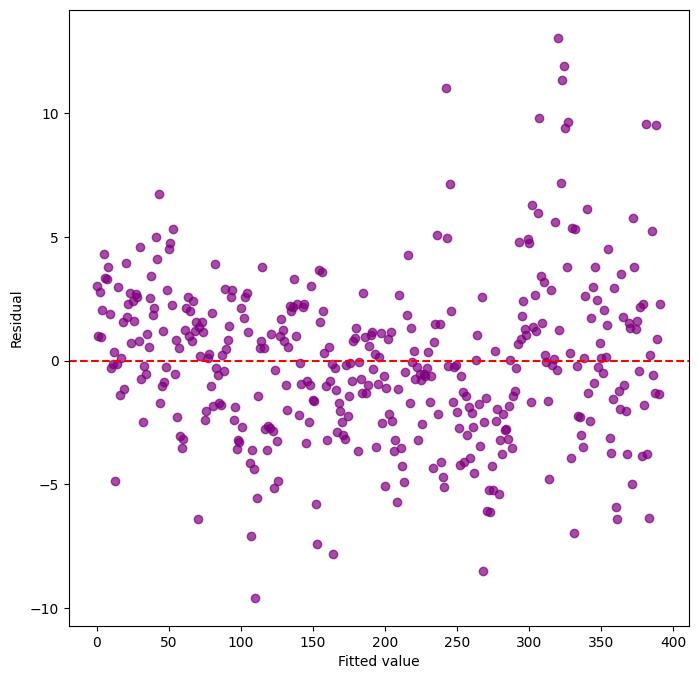

In [80]:
ax = plt.subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(len(results.resid)), results.resid, alpha = 0.7, color = 'purple')
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline (0, c='red', ls='--')

In [63]:
df = anova_lm(*[sm.OLS(y, D).fit() for D in design.build_sequence(features, anova_type='sequential')])
df.index = design.names
df

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
intercept,391.0,23818.993469,0.0,NaN,NaN,NaN
cylinders,390.0,9415.910391,1.0,14403.083079,1300.683788,2.806569e-126
displacement,389.0,8342.566366,1.0,1073.344025,96.929329,1.442524e-20
horsepower,388.0,7939.158297,1.0,403.408069,36.430140,3.700154e-09
weight,387.0,6963.433344,1.0,975.724953,88.113748,5.378297e-19
acceleration,386.0,6962.467273,1.0,0.966071,0.087242,7.678720e-01
year,385.0,4543.347025,1.0,2419.120249,218.460900,1.794078e-39
origin,384.0,4252.212530,1.0,291.134494,26.291171,4.665681e-07


Text(0, 0.5, 'Leverage ')

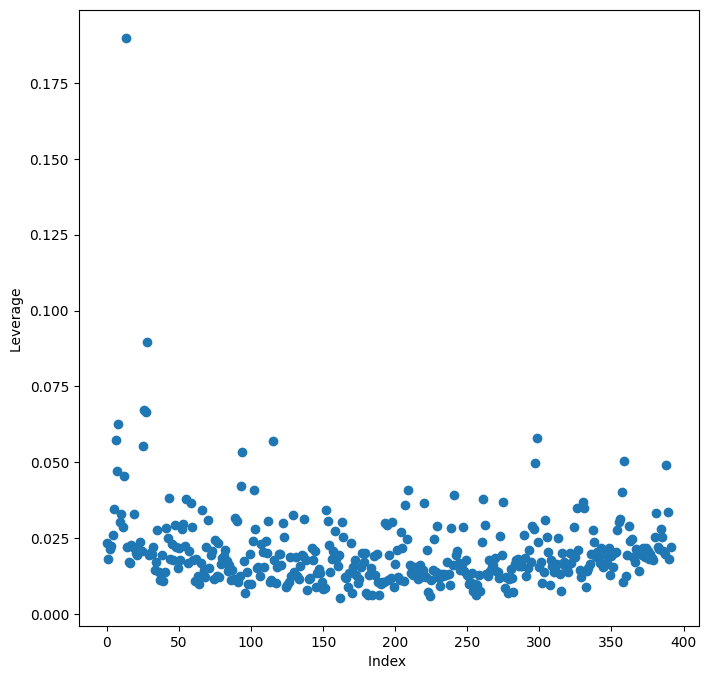

In [ ]:
infl = results.get_influence ()
ax = plt.subplots (figsize =(8 ,8))[1]
ax.scatter(np.arange(X.shape [0]) , infl.hat_matrix_diag )
ax.set_xlabel ('Index ')
ax.set_ylabel ('Leverage ')

In [82]:
boston_df = pd.read_csv('../Data/Boston.csv', index_col = 0)

In [89]:
boston_y = boston_df['medv']

In [90]:
X = MS([poly('lstat', degree=2) , 'age']).fit_transform(boston_df)
model3 = sm.OLS(boston_y, X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [96]:
vals = [VIF(X, i) for i in range (1, X.shape [1])]
vif = pd.DataFrame ({'vif ':vals}, index=X.columns [1:])
vif

,vif
cylinders,10.737535
displacement,21.836792
horsepower,9.943693
weight,10.831260
acceleration,2.625806
year,1.244952
origin,1.772386


In [97]:
auto_df.corr()

/var/folders/t2/6968g8md2c9g1mm1h0p9nxl588s4s1/T/ipykernel_49702/2859271034.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto_df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [98]:
beta0 = -6 
beta1 = 0.05
beta2 = 1

def model(x1, x2):
    return beta0 + beta1 * x1 + beta2 * x2

def probability(x1, x2):
    prob = np.exp(model(x1, x2))/(1 + np.exp(model(x1, x2)))
    return prob 

In [99]:
probability(40, 3.5)

0.37754066879814546

In [100]:
2.5/0.05

50.0

In [101]:
heart_disease_df = pd.read_csv('../Data/Heart_disease.csv')

In [109]:
heart_disease_df.columns
heart_disease_df = heart_disease_df.dropna()

In [110]:
y = heart_disease_df['TenYearCHD']
X = heart_disease_df.drop(columns = ['TenYearCHD'])

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

In [120]:
for i in np.arange(1, 10, 1):
    print(f'K = {i}')
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    print(accuracy_score(y, y_pred))
    print(confusion_matrix(y, y_pred))
    print(classification_report(y, y_pred))
    print('---------------------------------')

K = 1
1.0
[[3101    0]
 [   0  557]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3101
           1       1.00      1.00      1.00       557

    accuracy                           1.00      3658
   macro avg       1.00      1.00      1.00      3658
weighted avg       1.00      1.00      1.00      3658

---------------------------------
K = 2
0.8808091853471842
[[3101    0]
 [ 436  121]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      3101
           1       1.00      0.22      0.36       557

    accuracy                           0.88      3658
   macro avg       0.94      0.61      0.65      3658
weighted avg       0.90      0.88      0.85      3658

---------------------------------
K = 3
0.8851831601968289
[[3027   74]
 [ 346  211]]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3101
           1       0.74     

In [113]:
classification_report(y, y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      3101\n           1       1.00      1.00      1.00       557\n\n    accuracy                           1.00      3658\n   macro avg       1.00      1.00      1.00      3658\nweighted avg       1.00      1.00      1.00      3658\n'

In [121]:
type([])

list

In [122]:
my_list = ['string here', 9283, 1092.343, True, False, [2233, 2341.3423, True, False]]


In [124]:
my_list[3]

True

In [130]:
store_dictionary = {'Formula': 'y = mx+b', 
                    'm': [23, 12, 5342, 2124, 3,542,31, 2312,312,31,312,312], 
                    'b': 2.3}

In [ ]:
store_str = 'This is a string'

In [136]:
store_str.split()

['This', 'is', 'a', 'string']

In [151]:
file_path = 'User/username/Do'

In [156]:
#y = mx+b 



m= 2
b = 5 

x = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8]


for value in range(len(x)):
    print(m*x[value]+b)



3
5
7
9
11
13
15
17
19
21


In [148]:
len(my_list[-1])

4

In [149]:
my_list[-1]

[2233, 2341.3423, True, False]

In [159]:
counter_variable = 0

while counter_variable < len(x):
    #code here
    print(counter_variable)
    print(m*x[counter_variable]+b)
    print()
    counter_variable += 1

0
3

1
5

2
7

3
9

4
11

5
13

6
15

7
17

8
19

9
21



In [160]:
user_input = True
while user_input:
    #print('Infinite loop')
    try:
        int(input('Please give me a number'))
        user_input = False
    except:
        print('Please give me a number')
        continue

Please give me a number
Please give me a number
Please give me a number
Please give me a number
Please give me a number
Please give me a number
Please give me a number
Please give me a number
Please give me a number
Please give me a number


In [2]:
def Line(x, m, b):
    return m*x+b

In [4]:
var2 = Line(3, 4, 5)